<a href="https://colab.research.google.com/github/RaiUttamRai/Adding-a-file-in-dot-net-core-mvc/blob/main/COVID_19_Radiography_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Upload the files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#data_path = '/content/drive/MyDrive/COVID-19_Project/COVID-19_Radiography_Dataset'
!ls /content/drive/MyDrive




Mounted at /content/drive
 1485791541540.jpg
 1486039384354.jpg
 1486039548206.jpg
 1486039801460.jpg
 1486134046298.jpg
 1486136505591.jpg
 1486198897955.jpg
 20161019_102844.jpg
 20161126_093449.jpg
 20161126_093507.jpg
 20161126_093617.jpg
 20161126_100128.jpg
 20161126_100145.jpg
 20161126_100222.jpg
 20161126_101300.jpg
 20161126_102520.jpg
 20161126_110409.jpg
 20161126_110417.jpg
 2017-02-02-12-20-17-746.jpg
 20171103_060648.jpg
 20180216_174130.jpg
 20180309_173103.jpg
 20200307_141459.jpg
 20200319_172622.jpg
 20200319_172637.jpg
 20200326_170955-01.jpeg
 20200326_181156.jpg
 20200407_201719.jpg
 20200411_200032-01.jpeg
 20200411_200117.jpg
 20200411_200239.jpg
 20200412_172359.jpg
 20200412_172422.jpg
 20200412_172800.jpg
 20200505_175128.jpg
 20200505_175131.jpg
 20200508_122355.jpg
 20200508_122739.jpg
 20200508_122813-01.jpeg
 20200511_194526.jpg
 20200511_194541.jpg
 20200520_142818.jpg
 20200520_142834.jpg
 20200521_113424.jpg
 20200524_133048.jpg
 20200617_215439-01.jpe

In [2]:
!ls "/content/drive/MyDrive/COVID‑19 Radiography Dataset"


COVID-19_Radiography_Dataset


In [3]:
#uupdate the path
import os

data_path = "/content/drive/MyDrive/COVID‑19 Radiography Dataset"

print("Contents in dataset folder:")
print(os.listdir(data_path))


Contents in dataset folder:
['COVID-19_Radiography_Dataset']


In [4]:
#only covid images show
covid_images_path= "/content/drive/MyDrive/COVID‑19 Radiography Dataset/COVID-19_Radiography_Dataset/COVID"
#get list of image filename
image_files= os.listdir(covid_images_path)
#len(image_files)
image_files[:10]



['images', 'masks']

In [5]:
#only Lung opacity images show
lung_images_path= "/content/drive/MyDrive/COVID‑19 Radiography Dataset/COVID-19_Radiography_Dataset/Lung_Opacity"
#get list of image filename
lung_image_files= os.listdir(lung_images_path)
#len(image_files)
lung_image_files[:10]
len(lung_image_files)

2

#Data Preprocessing
this is we prepare the image for training

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(
    rescale=1./255,  #normalize pixel values 0-255 to 0-1
    rotation_range=15, #image rotate by 15
    zoom_range=0.1, #zoom upto 10%
    width_shift_range=0.1, #horizontal shift
    height_shift_range=0.1, #vertical
    horizontal_flip=True,
    validation_split=0.2
)


#Load training and data validation
flow_from_directory=> load images and automatically assign labels based on folder name

In [7]:
train_data= train_datagen.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)
val_data= train_datagen.flow_from_directory(
    data_path,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 40 images belonging to 1 classes.
Found 10 images belonging to 1 classes.


#Define the CNN model


1.   Conv2D = applies the filter to extract features from this image
2.   MaxPooling = reduces the size of features maps
3.   Flatten = convert to 2D -> 1D
4.   Dropout = helps to prevent overfitting



In [8]:
import tensorflow as tf
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation="softmax")



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and fit the models

In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)
#fit the model
history = model.fit(train_data,epochs=20,validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 8s/step - accuracy: 0.5917 - loss: 0.6590 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 1.0000 - loss: 9.9341e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 -

#Evaluate this model

In [10]:
loss,accuracy=model.evaluate(val_data)
print(f"Validation accuracy:{accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation accuracy:100.00%


#Visualized performance

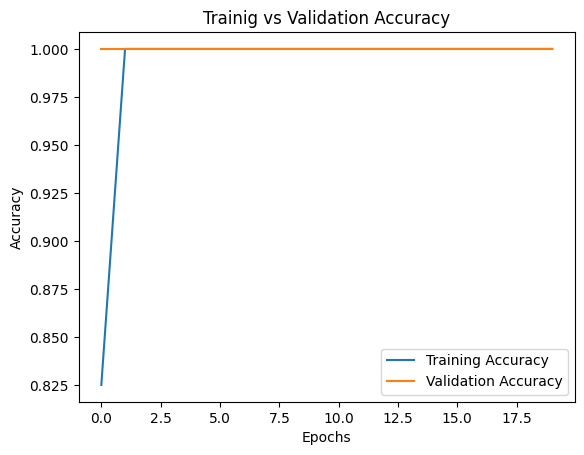

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Trainig vs Validation Accuracy")
plt.show()

# Make Prediction

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
#load a single image and predict its class
img_path = "/content/drive/MyDrive/COVID‑19 Radiography Dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png"
img=image.load_img(img_path,target_size=(224,224))
img_array=image.img_to_array(img)/255.0
img_array=np.expand_dims(img_array,axis=0)
predict=model.predict(img_array)
predicted_classes=np.argmax(predict)
print("Predicted Classes:", predicted_classes)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/COVID‑19 Radiography Dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png'

In [14]:
#2 HDF5 Format
model.save("COVID-19_Radiography_Database.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')